In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from mlxtend.data import loadlocal_mnist

In [2]:
def process_mnist_data() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    mnist_path = './MNIST/'
    train_images, train_labels = loadlocal_mnist(
        images_path = mnist_path + './train-images.idx3-ubyte',
        labels_path = mnist_path + './train-labels.idx1-ubyte'
    )
    test_images, test_labels = loadlocal_mnist(
        images_path = mnist_path + './t10k-images.idx3-ubyte',
        labels_path = mnist_path + './t10k-labels.idx1-ubyte'
    )
    return train_images, train_labels, test_images, test_labels

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [4]:
def process_cifar_dataset() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    cifar_path = './cifar-10-python/cifar-10-batches-py'
    data_batch = unpickle(cifar_path + '/data_batch_1')
    train_images, train_labels = data_batch[b'data'], np.array(data_batch[b'labels'])
    for i in range(2,6):
        data_batch = unpickle(cifar_path + '/data_batch_' + str(i))
        train_images = np.concatenate((train_images, data_batch[b'data']), axis=0)
        train_labels = np.concatenate((train_labels, np.array(data_batch[b'labels'])), axis=0)
    test_batch = unpickle(cifar_path + '/test_batch')
    test_images, test_labels = test_batch[b'data'], np.array(test_batch[b'labels'])
    return train_images, train_labels, test_images, test_labels

In [5]:
def process_toy_dataset():
    toy_dataset_path = './Toy Dataset/'

In [6]:
def relu(matrix:np.ndarray) -> np.ndarray:
    return matrix * (matrix > 0)

In [7]:
class ConvolutionLayer:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding

    def forward(self, input_image: np.ndarray) -> np.ndarray:
        input_dimentions = input_image.shape[0]
        output_dimentions = (input_dimentions - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_image.shape

        filters = np.random.rand(
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension,
            input_shape[2]
        )

        bias = np.random.rand(self.output_channel_count)

        # Pad the image
        padded_image = np.zeros((
            input_shape[0]+ 2*self.padding,
            input_shape[1]+ 2*self.padding,
            input_shape[2]
        ))

        # Padding variables
        x_min = self.padding
        x_max = x_min + input_shape[0]
        y_min = self.padding
        y_max = y_min + input_shape[1]

        padded_image[x_min:x_max, y_min:y_max, :] = input_image
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((output_dimentions, output_dimentions, self.output_channel_count))

        for i in range(self.output_channel_count):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= padded_dimensions[1]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= padded_dimensions[0]:
                    image_slice = padded_image[image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                    output[out_x, out_y, i] = np.sum(image_slice * filters[i, :, :, :]) + bias[i]
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self):
        pass

In [8]:
class ActivationLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        return relu(input_matrix)

    def backward(self):
        pass

In [9]:
class MaxPoolingLayer:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape

        output_dimension = (input_dimensions[0] - self.filter_dimension) // self.stride + 1

        output = np.zeros((output_dimension, output_dimension, input_dimensions[2]))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= input_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= input_dimensions[0]:
                image_slice = image[image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.max(image_slice, axis=(0, 1))
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [10]:
class FlatteningLayer:
    def __init__(self):
        pass

    def forward(self, image: np.ndarray) -> np.ndarray:
        return image.flatten().reshape(-1, 1)

    def backward(self):
        pass

In [11]:
class FullyConnectedLayer:
    def __init__(self, output_dimension: int):
        self.output_dimension = output_dimension

    def forward(self, flattened_input: np.ndarray) -> np.ndarray:
        weights = np.random.rand(flattened_input.shape[0], self.output_dimension)
        bias = np.random.rand(self.output_dimension, 1)

        return weights.T @ flattened_input + bias

    def backward(self):
        pass

In [12]:
class SoftmaxLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray):
        exp = np.exp(input_matrix)
        exp /= np.sum(exp)
        return exp

    def backward(self):
        pass

(28, 28, 10)


array([[0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086

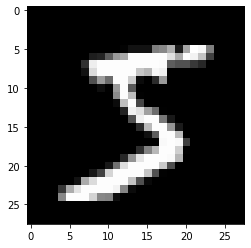

In [13]:
x_train, y_train, x_test, y_test = process_mnist_data()
c = ConvolutionLayer(10, 3, 1, 1)
img = x_train[0].reshape(28, 28, 1)
plt.imshow(img, cmap='gray')
o = c.forward(img)
print(o.shape)
o [:, :, 0]

In [14]:
m = MaxPoolingLayer(2, 2)
o1 = m.forward(o)
o1[:, :, 0]

array([[0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ,
        0.2086563 , 0.2086563 , 0.2086563 , 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2086563 , 0.30683615, 0.68692745,
        1.41900419, 2.20588351, 2.6488286 , 3.14250093, 2.92996611,
        3.43231898, 2.89110454, 0.75420856, 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2086563 , 1.5888192 , 4.27046923,
        5.04683779, 5.51175398, 5.46135354, 5.57954972, 3.44521561,
        3.89708834, 2.99462622, 0.58433818, 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2086563 , 1.87360031, 4.52492224,
        5.46103338, 5.6505519 , 3.9916569 , 4.04552957, 2.19228068,
        0.72361513, 0.38159703, 0.2086563 , 0.2086563 ],
       [0.2086563 , 0.2086563 , 0.2

In [15]:
f = FlatteningLayer()
o2 = f.forward(o1)
o2

array([[0.2086563 ],
       [0.79036034],
       [0.3854135 ],
       ...,
       [0.89679375],
       [0.48449396],
       [0.22178741]])

In [16]:
fc = FullyConnectedLayer(10)
o3 = fc.forward(o2)
o3

array([[1488.99514374],
       [1435.25537592],
       [1459.56712431],
       [1462.9758307 ],
       [1484.73735746],
       [1454.18000156],
       [1465.20843982],
       [1445.76490326],
       [1436.53270312],
       [1457.5992538 ]])

In [17]:
s = SoftmaxLayer()
o3 = np.arange(1, 11).reshape(10, 1)
o4 = s.forward(o3)
o4

array([[7.80134161e-05],
       [2.12062451e-04],
       [5.76445508e-04],
       [1.56694135e-03],
       [4.25938820e-03],
       [1.15782175e-02],
       [3.14728583e-02],
       [8.55520989e-02],
       [2.32554716e-01],
       [6.32149258e-01]])

(32, 32, 10)


array([[1.52152808, 1.96643033, 1.90516528, ..., 4.73927418, 4.64530332,
        3.69138818],
       [1.79643964, 2.44402125, 2.43424072, ..., 6.43976695, 6.23435148,
        4.96189837],
       [1.46392305, 1.9911288 , 2.25805257, ..., 5.61186672, 5.27760122,
        4.16556934],
       ...,
       [5.12048081, 7.92081402, 7.105016  , ..., 6.48126773, 5.14183588,
        2.49937522],
       [5.05993216, 7.95848639, 7.39300447, ..., 6.98697885, 6.27786227,
        3.59686117],
       [3.3717981 , 5.40819435, 5.06072237, ..., 5.20047503, 4.99603202,
        3.17025004]])

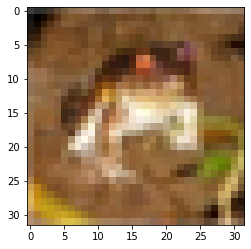

In [18]:
x_train, y_train, x_test, y_test = process_cifar_dataset()
c = ConvolutionLayer(10, 3, 1, 1)
img = x_train[0].reshape(3, 32, 32)
img = img.transpose(1, 2, 0)
plt.imshow(img)
o = c.forward(img)
print(o.shape)
o[:, :, 0]

In [19]:
o1 = m.forward(o)
o1[:, :, 0]

array([[ 2.44402125,  3.20643232,  5.17454759,  5.90424264,  5.8801886 ,
         5.57412696,  5.65659028,  5.7044555 ,  5.67929015,  5.58785847,
         5.97041746,  5.9809918 ,  6.26369791,  6.70059591,  6.61982133,
         6.23435148],
       [ 2.51151777,  4.08371002,  5.04251589,  5.20863878,  5.08947627,
         5.19065739,  5.17837698,  5.46226751,  5.21381288,  5.35371192,
         5.93738155,  6.01946075,  5.67463154,  5.84182322,  5.84997835,
         5.27760122],
       [ 3.88108372,  5.06364969,  5.28530775,  5.09079539,  5.1941793 ,
         5.23307347,  5.00585271,  5.14622109,  4.54863593,  4.96207347,
         5.42847382,  5.78544605,  6.06788421,  5.4697534 ,  4.70600144,
         3.64411452],
       [ 5.21012152,  5.47962179,  5.46954766,  5.29656958,  5.54705286,
         5.3154548 ,  4.14353248,  3.83580876,  5.97536929,  5.38668822,
         4.13173335,  5.56979541,  6.16160523,  5.89843058,  4.83642275,
         4.82375232],
       [ 6.71476881,  6.43136774,  5